### How to generate Gregory Plots
Here we can plot the 2-meter-temperature versus the net radiation to demonsrate potential model drifts.

In [1]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import gregory_plot

In [2]:
lumi=False

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [3]:
if lumi:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'historical-1990-devcon' , source = 'lra-r100-monthly')   
else:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')
    ifs_control = process_model_data(model =  'IFS' , exp = 'control-1950-devcon' , source = 'lra-r100-monthly')
    ifs_9km = process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly")

/home/b/b382257/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


In [7]:
era5 = process_model_data(model = 'ERA5', exp = 'era5', source = 'monthly', fix = True)

In [8]:
era5

{'model': 'era5',
 'exp': 'era5',
 'source': 'monthly',
 'data': <xarray.Dataset>
 Dimensions:  (time: 996, lat: 721, lon: 1440)
 Coordinates:
   * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
   * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
   * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
 Data variables:
     2t       (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
     mtntrf   (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
     mtnsrf   (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
     tnr      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
 Attributes:
     CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
     Conventions:  CF-1.6
     institution:  European Centre for Medium-Range Weather Forecasts
     history:      Tue Dec 05 12:27:47 202

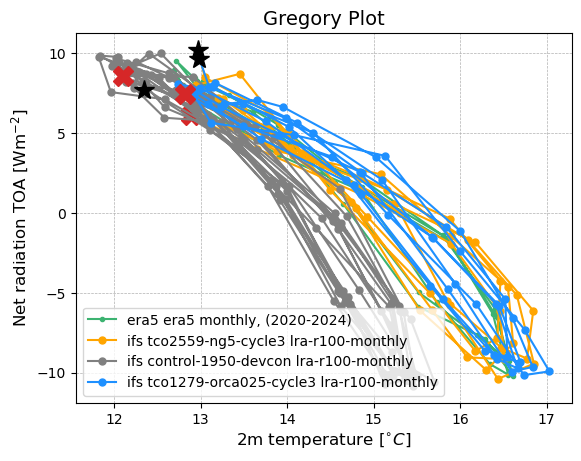

In [10]:
model_list = [ifs_4km, ifs_control, ifs_9km]
gregory_plot(obs_data = era5, models = model_list)